In [5]:
#import rich.pretty
#import commons
from db_actions import db_actions
import pandas as pds
import numpy as np

In [26]:
csvPath = ""
if csvPath != "":
    dF = None
    try:
        dF = pds.read_csv(open(csvPath, "r"))  # already filtered for realtime > 1000)
    except:
        pass
    try:
        dF = pds.read_csv(open(csvPath + ".csv", "r"))
    except:
        pass
    if dF is None:
        raise Exception(f"Couldn't open csv file {csvPath!r} or {(csvPath + '.csv')!r}")
else:
    with db_actions.connect() as conn:
        dF = pds.read_sql('SELECT * FROM "runtimeScorePredBase1000"', conn)
# print(dF)
x_cols = [
    "build-linux-kernel1",
    "fio2",
    "fio3",
    "fio4",
    "fio5",
    "fio6",
    "fio7",
    "fio8",
    "fio9",
    "iperf10",
    "iperf11",
    "iperf12",
    "iperf13",
    "john-the-ripper14",
    "john-the-ripper15",
    "ramspeed16",
    "ramspeed17",
    "ramspeed18",
    "ramspeed19",
    "ramspeed20",
    "ramspeed21",
    "ramspeed22",
    "ramspeed23",
    "ramspeed24",
    "ramspeed25",
    "stream26",
    "stream27",
    "stream28",
    "stream29",
    "pCpu",
    "cpus",
    "rss",
    "vmem",
    "rchar",
    "wchar",
    "syscr",
    "syscw",
]
y_cols = "realtime"
X = dF[x_cols]
y = dF[y_cols]

In [27]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X

,build-linux-kernel1,fio2,fio3,fio4,fio5,fio6,fio7,fio8,fio9,iperf10,...,stream28,stream29,pCpu,cpus,rss,vmem,rchar,wchar,syscr,syscw
0,0.005693,2996.0,11.7,2996.0,11.7,62.0,131.000000,62.0,131.000000,262.399994,...,47902.000000,50250.699219,89.7,1,95793152,4427087872,50139522,39671,12832,109
1,0.004131,2997.0,11.7,2996.0,11.7,62.0,131.000000,62.0,131.000000,479.000000,...,48371.101562,51294.500000,88.4,1,69025792,4420730880,50139822,39657,12841,109
2,0.005693,2996.0,11.7,2996.0,11.7,62.0,131.000000,62.0,131.000000,262.399994,...,47902.000000,50250.699219,99.2,2,60620800,65343488,49172852,33434019,1712,50
3,0.005693,2996.0,11.7,2996.0,11.7,62.0,131.000000,62.0,131.000000,262.399994,...,47902.000000,50250.699219,142.5,2,185581568,3401027584,38953944,3335442,30823,10707
4,0.004131,2997.0,11.7,2996.0,11.7,62.0,131.000000,62.0,131.000000,479.000000,...,48371.101562,51294.500000,99.2,2,60461056,65343488,49172855,33434020,1712,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33340,0.000823,3056.0,11.2,3057.0,11.2,24.0,56.099998,24.0,56.099998,658.000000,...,9643.400391,10218.400391,103.4,2,543965184,973762560,202983220,260844,22898,137
33341,0.000823,3056.0,11.2,3057.0,11.2,24.0,56.099998,24.0,56.099998,658.000000,...,9643.400391,10218.400391,131.9,2,253304832,2260905984,11549869,2042,325,112
33342,0.000823,3056.0,11.2,3057.0,11.2,24.0,56.099998,24.0,56.099998,658.000000,...,9643.400391,10218.400391,101.8,2,403304448,752922624,24242299,2711789,2082,618
33343,0.000823,3056.0,11.2,3057.0,11.2,24.0,56.099998,24.0,56.099998,658.000000,...,9643.400391,10218.400391,108.7,2,234266624,1296486400,408933998,8433925,94140,659


In [29]:
g = GenericUnivariateSelect(f_regression, mode='k_best', param=16)
X_poly = PolynomialFeatures(3, interaction_only=True).fit_transform(X)
X_new = g.fit_transform(X, y)
filtered_X_cols = np.array(x_cols)[g.get_support(indices=True)]
", ".join(map(lambda x: repr(x), filtered_X_cols))

/home/anon/anaconda3/envs/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -


"'john-the-ripper15', 'ramspeed17', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed23', 'ramspeed24', 'ramspeed25', 'pCpu', 'cpus', 'vmem', 'rchar', 'wchar', 'syscr', 'syscw'"

In [22]:
#filtered_X_cols

In [23]:
import seaborn as sbs

top1 = sorted(np.array(g.scores_)[g.get_support(indices=True)])
top1

[1189.5672716511838,
 2127.189226571209,
 2921.432914913615,
 2921.432914913615,
 2938.1826443015266,
 2938.1826443015266,
 4881.016650688156,
 4948.353272317276,
 5420.439155568325,
 5668.352489297517,
 6471.481803464417,
 6643.007352889558,
 6875.102960526589,
 6984.978597252819,
 6998.746659028816,
 7169.175933760193,
 8472.7617905236,
 9344.549998798042,
 9916.124789308398,
 9968.143804972935,
 10596.266333728827,
 11887.746577875665,
 12007.811576980199,
 12062.524226013247,
 12564.060723858704,
 13668.454590693013]

In [24]:
len(np.array(g.scores_)[g.get_support(indices=True)])

26

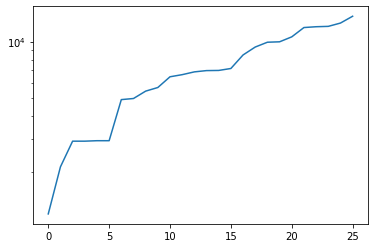

In [25]:
p = sbs.lineplot(data=sorted(np.array(g.scores_)[g.get_support(indices=True)]))
p.set_yscale("log")

In [155]:
csvPath = "predBase.csv"
if csvPath != "":
    dF = None
    try:
        dF = pds.read_csv(open(csvPath, "r"))  # already filtered for realtime > 1000)
    except:
        pass
    try:
        dF = pds.read_csv(open(csvPath + ".csv", "r"))
    except:
        pass
    if dF is None:
        raise Exception(f"Couldn't open csv file {csvPath!r} or {(csvPath + '.csv')!r}")
else:
    with db_actions.connect() as conn:
        dF = pds.read_sql('SELECT * FROM "averageRuntimesPredictionBase1000"', conn)
# print(dF)
x_cols = [
    'john-the-ripper15', 'ramspeed16', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22',
    'ramspeed23', 'ramspeed24', 'ramspeed25'
    # 'fio3', 'fio5', 'john-the-ripper15', 'ramspeed16', 'ramspeed17', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22', 'ramspeed23', 'ramspeed24', 'ramspeed25'
    # 'build-linux-kernel1', 'fio3', 'fio5', 'fio6', 'fio7', 'fio8', 'fio9', 'john-the-ripper15', 'ramspeed16', 'ramspeed17', 'ramspeed18', 'ramspeed19', 'ramspeed20', 'ramspeed21', 'ramspeed22', 'ramspeed23', 'ramspeed24', 'ramspeed25', 'stream27'
]
y_cols = "rank"
X = dF[x_cols]
y = dF[y_cols]

In [156]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [157]:
X

,john-the-ripper15,ramspeed16,ramspeed18,ramspeed19,ramspeed20,ramspeed21,ramspeed22,ramspeed23,ramspeed24,ramspeed25
0,3,12,12,13,13,14,12,13,11,12
1,16,2,2,2,2,1,2,1,2,2
2,8,1,1,1,1,2,1,2,1,1
3,15,22,22,21,21,21,21,20,22,21
4,1,9,9,10,9,9,8,11,7,9
...,...,...,...,...,...,...,...,...,...,...
2128,26,20,20,20,20,19,20,21,20,19
2129,23,21,21,22,22,22,22,23,21,22
2130,24,14,15,15,15,15,14,16,15,16
2131,18,15,16,16,16,16,15,15,16,17


In [158]:
g = GenericUnivariateSelect(f_regression, mode='k_best', param=15)
X_poly = PolynomialFeatures(3, interaction_only=True).fit_transform(X)
X_new = g.fit_transform(X_poly, y)
#filtered_X_cols = np.array(x_cols)[g.get_support(indices=True)]
#", ".join(map(lambda x: repr(x), filtered_X_cols))

/home/alex/anaconda3/envs/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/alex/anaconda3/envs/py/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [159]:
#filtered_X_cols

In [160]:
import seaborn as sbs

top2 = sorted(np.array(g.scores_)[g.get_support(indices=True)])
top2

[656.0245978507477,
 658.2317274806264,
 663.6896663429989,
 667.9922300965396,
 669.7489681454629,
 841.9382416527793,
 869.80880998922,
 892.1068335904318,
 895.8952341266631,
 901.6764759125199,
 912.9808719335363,
 914.0295957010733,
 917.1645814984736,
 970.5810773101731,
 1021.1695521511341]

In [161]:
len(np.array(g.scores_)[g.get_support(indices=True)])

15

<AxesSubplot:>

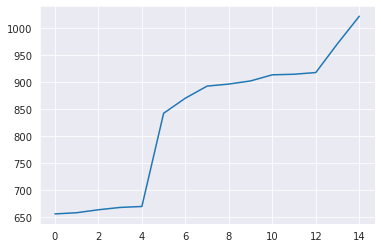

In [162]:
sbs.lineplot(data=sorted(np.array(g.scores_)[g.get_support(indices=True)]))

In [163]:
np.array(top1) - np.array(top2)

ValueError: operands could not be broadcast together with shapes (5,) (15,) 